# LINE Messaging API with Python SDK
<img src="./images/line-bot-sdk.png" width="500" alt="LINE Bot SDK" />

In [ ]:
import os
from dotenv import load_dotenv
from linebot.v3.messaging import (
    Configuration,
    ApiClient,
    MessagingApi,
    PushMessageRequest,
    TextMessage,
    ImageCarouselTemplate,
    DatetimePickerAction,
    TemplateMessage,
    ImageCarouselColumn,
    FlexMessage, 
    FlexContainer,   
    ShowLoadingAnimationRequest
)


In [ ]:
load_dotenv()

CHANNEL_ACCESS_TOKEN = os.environ["LINE_CHANNEL_ACCESS_TOKEN"]
CHANNEL_SECRET = os.environ["LINE_CHANNEL_SECRET"]
USER_ID = os.environ["LINE_USER_ID"]


configuration = Configuration(access_token=CHANNEL_ACCESS_TOKEN)
api_client = ApiClient(configuration)
line_bot_api = MessagingApi(api_client)

## Show Loading Animation
<img src="images/loading-indicator.034a7bb7.png" alt="Loading Indicator" width="400" />

LINK: https://developers.line.biz/en/docs/messaging-api/use-loading-indicator/

In [ ]:
line_bot_api.show_loading_animation(
    ShowLoadingAnimationRequest(chat_id=USER_ID)
)

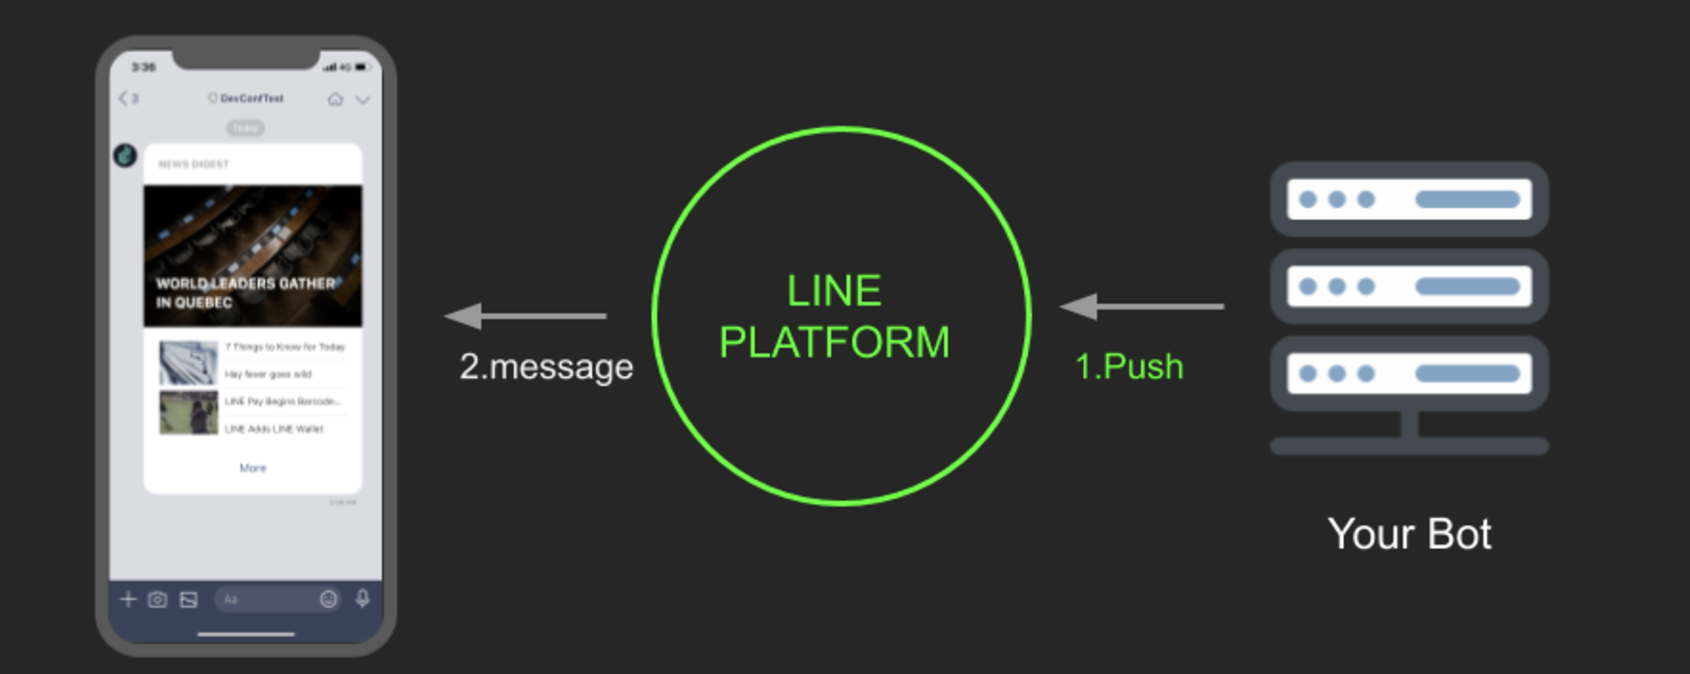

In [ ]:
line_bot_api.push_message(
    PushMessageRequest(
        to=USER_ID, 
        messages=[TextMessage(text="PUSH!")]
    )
)

In [ ]:
image_carousel_template = ImageCarouselTemplate(
    columns=[
        ImageCarouselColumn(
            image_url="https://developers-resource.landpress.line.me/fx/clip/clip1.jpg",
            action=DatetimePickerAction(
                label="datetime", data="datetime_postback", mode="datetime"
            ),
        ),
        ImageCarouselColumn(
            image_url="https://developers-resource.landpress.line.me/fx/clip/clip2.jpg",
            action=DatetimePickerAction(
                label="date", data="date_postback", mode="date"
            ),
        ),
    ]
)
template_message = TemplateMessage(
    alt_text="ImageCarousel alt text", template=image_carousel_template
)

line_bot_api.push_message(
    PushMessageRequest(
        to=USER_ID, 
        messages=[TextMessage(text="PUSH!")]
    )
)

# Flex Message 

Link: https://developers.line.biz/flex-simulator/


<img src="images/flex_messages.png" alt="Flex Message Show Cases" width="500" />


In [ ]:
flex_message_json = """{
  "type": "bubble",
  "hero": {
    "type": "image",
    "url": "https://developers-resource.landpress.line.me/fx/img/01_3_movie.png",
    "size": "full",
    "aspectRatio": "20:13",
    "aspectMode": "cover",
    "action": {
      "type": "uri",
      "uri": "https://line.me/"
    }
  },
  "body": {
    "type": "box",
    "layout": "vertical",
    "spacing": "md",
    "contents": [
      {
        "type": "text",
        "text": "BROWN'S ADVENTURE",
        "wrap": true,
        "weight": "bold",
        "gravity": "center",
        "size": "xl"
      },
      {
        "type": "box",
        "layout": "vertical",
        "margin": "lg",
        "spacing": "sm",
        "contents": [
          {
            "type": "box",
            "layout": "baseline",
            "spacing": "sm",
            "contents": [
              {
                "type": "text",
                "text": "Date",
                "color": "#aaaaaa",
                "size": "sm",
                "flex": 1
              },
              {
                "type": "text",
                "text": "Monday 25, 9:00PM",
                "wrap": true,
                "size": "sm",
                "color": "#666666",
                "flex": 4
              }
            ]
          },
          {
            "type": "box",
            "layout": "baseline",
            "spacing": "sm",
            "contents": [
              {
                "type": "text",
                "text": "Place",
                "color": "#aaaaaa",
                "size": "sm",
                "flex": 1
              },
              {
                "type": "text",
                "text": "7 Floor, No.3",
                "wrap": true,
                "color": "#666666",
                "size": "sm",
                "flex": 4
              }
            ]
          },
          {
            "type": "box",
            "layout": "baseline",
            "spacing": "sm",
            "contents": [
              {
                "type": "text",
                "text": "Seats",
                "color": "#aaaaaa",
                "size": "sm",
                "flex": 1
              },
              {
                "type": "text",
                "text": "C Row, 18 Seat",
                "wrap": true,
                "color": "#666666",
                "size": "sm",
                "flex": 4
              }
            ]
          }
        ]
      },
      {
        "type": "box",
        "layout": "vertical",
        "margin": "xxl",
        "contents": [
          {
            "type": "image",
            "url": "https://developers-resource.landpress.line.me/fx/img/linecorp_code_withborder.png",
            "aspectMode": "cover",
            "size": "xl",
            "margin": "md"
          },
          {
            "type": "text",
            "text": "You can enter the theater by using this code instead of a ticket",
            "color": "#aaaaaa",
            "wrap": true,
            "margin": "xxl",
            "size": "xs"
          }
        ]
      }
    ]
  }
}
"""

In [ ]:
flex_message = FlexMessage(
    alt_text="Test Flex Message",
    contents=FlexContainer.from_json(flex_message_json)
)

line_bot_api.push_message(
    PushMessageRequest(
        to=USER_ID, 
        messages=[
            flex_message
        ]
    )
)


Bad pipe message: %s [b'0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nHost: localhost:40443\r\nUs', b'-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrom']
Bad pipe message: %s [b'131.0.0.0 Safari/537.36\r\nAccept-Encoding: gzip, deflate, br, zstd\r\nAccept-Language: en-US,en;q=0.9,t', b'q=0.8\r\nCache-Control: max-age=0\r\nReferer: https://refactored-space-barnacle-jjpxvjrqw47fp995.github.dev', b'\nX-Request-ID: 2a7275378e6273040ded040f5153d01', b'\nX-Real-IP: 58.8.14.182\r\nX-Forwarded-Port: 443\r\nX-F', b'warded-Scheme: https\r\nX-Original-URI: /\r\nX-Scheme: https\r\nsec-fetch-site: same-site\r\nsec-fetch-mode: navigate\r']
